In [1]:
import pmagpy.pmag as pmag
import pmagpy.ipmag as ipmag

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
PM_data1 = pd.read_csv('PM_data2/sites.txt',sep='\t',header=1)
PM_data1.columns

Index(['site', 'location', 'samples', 'specimens', 'age', 'age_high',
       'age_low', 'age_sigma', 'age_unit', 'dir_alpha95', 'dir_comp_name',
       'dir_dec', 'dir_inc', 'dir_k', 'dir_n_samples', 'dir_n_specimens_lines',
       'dir_n_specimens_planes', 'dir_polarity', 'dir_r',
       'dir_tilt_correction', 'lat', 'lon', 'analysts', 'criteria',
       'software_packages', 'citations', 'method_codes', 'result_quality',
       'result_type', 'vgp_dm', 'vgp_dp', 'vgp_lat', 'vgp_lon',
       'dir_n_specimens'],
      dtype='object')

In [41]:
PM_data1_HT = PM_data1[PM_data1.dir_comp_name == 'HT1']
PM_data1_HT_filtered = PM_data1_HT[PM_data1_HT.dir_alpha95 < 20]
PM_data1_HT_tc = PM_data1_HT_filtered[PM_data1_HT_filtered.dir_tilt_correction == 100]
PM_data1_HT_is = PM_data1_HT_filtered[PM_data1_HT_filtered.dir_tilt_correction == 0]

In [42]:
PM_data1_HT_tc.dir_dec.tolist()

[210.1, 111.1, 124.9, 149.0, 56.9, 129.1]

In [44]:
HT_tc_dec = PM_data1_HT_tc.dir_dec.tolist()
HT_tc_inc = PM_data1_HT_tc.dir_inc.tolist()
HT_tc_a95 = PM_data1_HT_tc.dir_alpha95.tolist()

HT_is_dec = PM_data1_HT_is.dir_dec.tolist()
HT_is_inc = PM_data1_HT_is.dir_inc.tolist()
HT_is_a95 = PM_data1_HT_is.dir_alpha95.tolist()

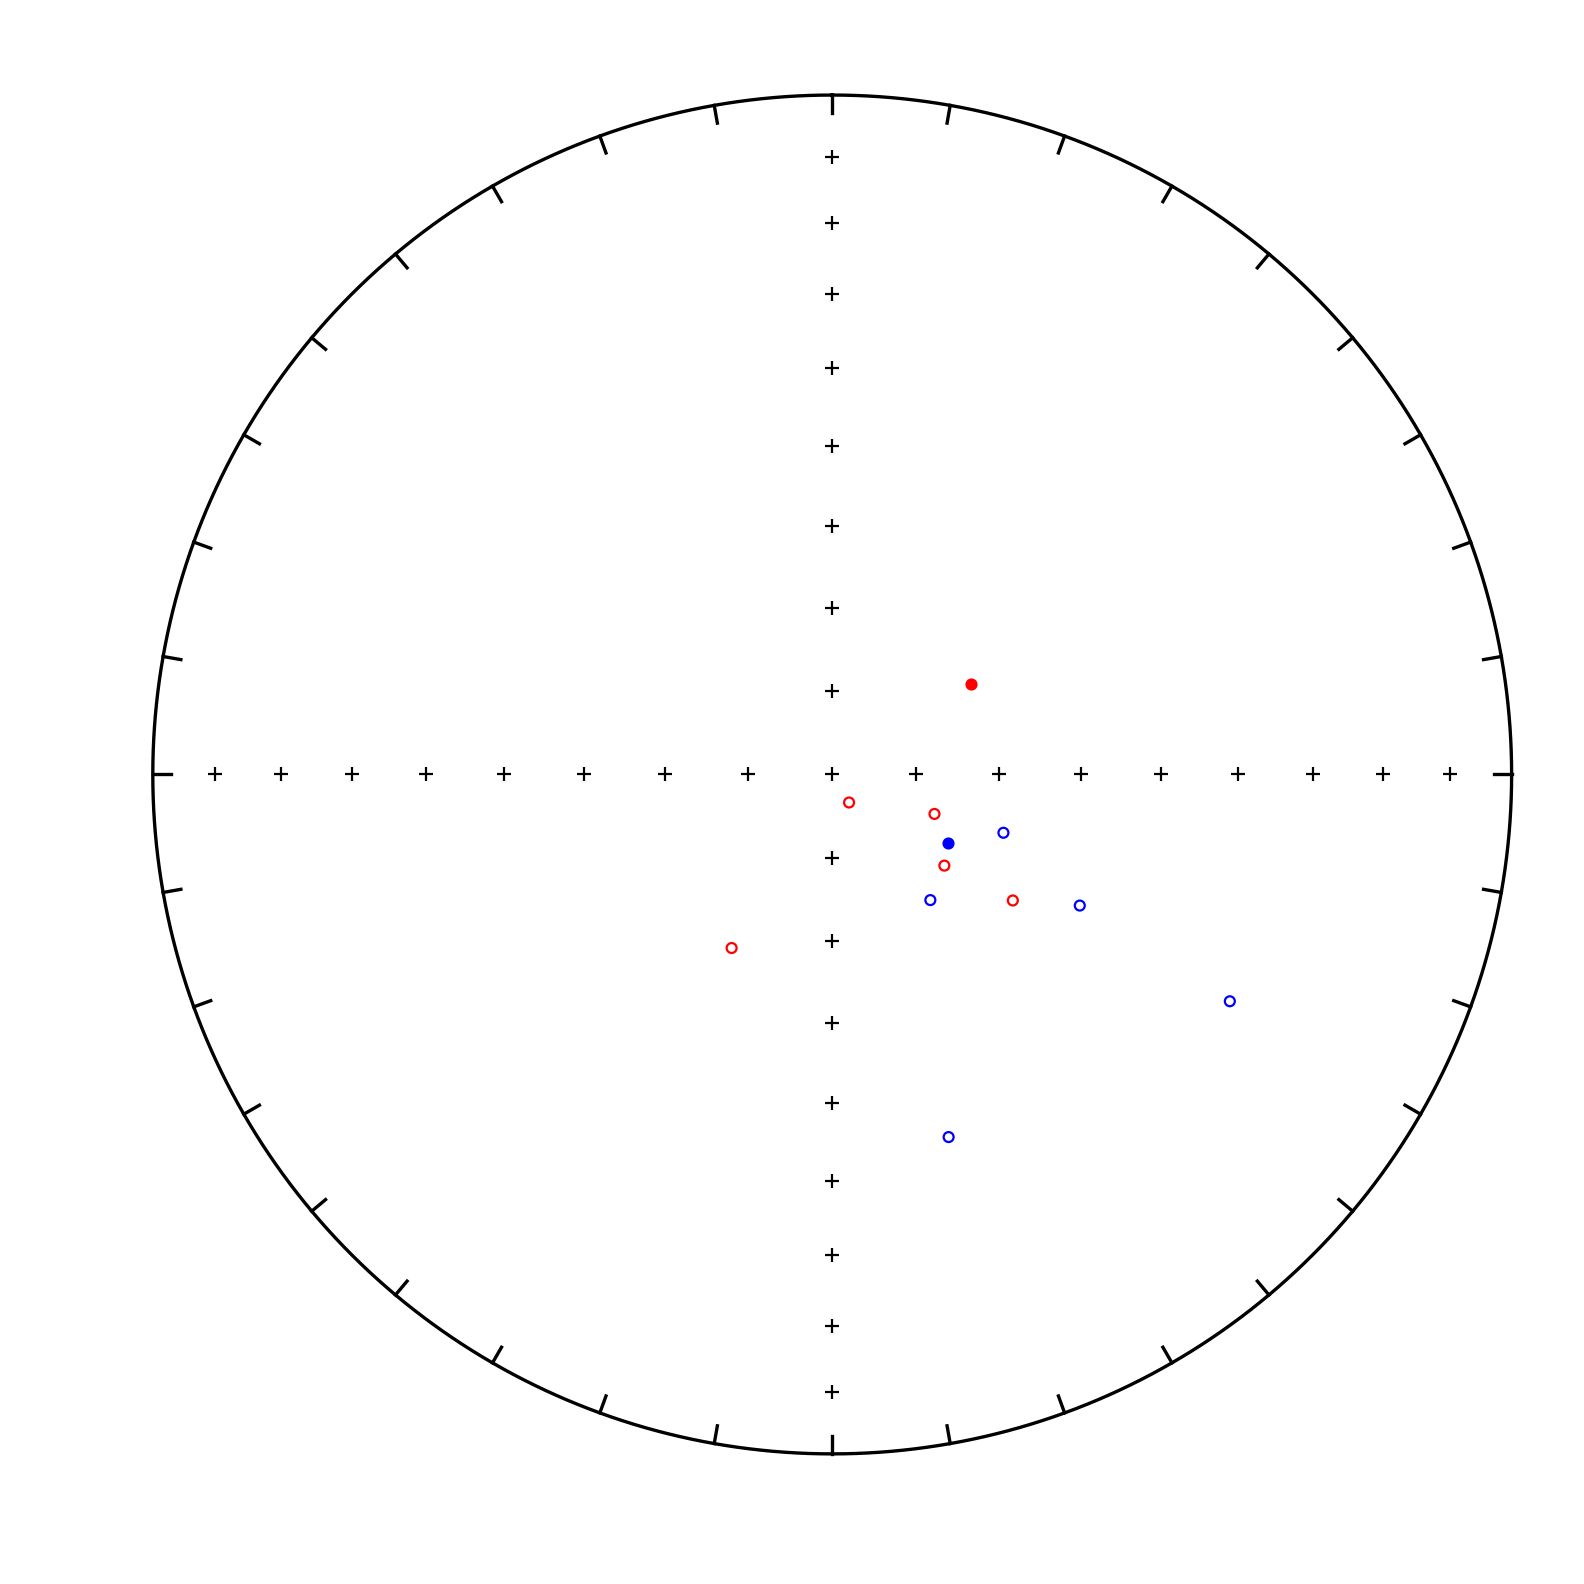

In [45]:
fignum = 1
plt.figure(num=fignum,figsize=(10,10),dpi=160)
ipmag.plot_net(fignum)
ipmag.plot_di(HT_tc_dec, HT_tc_inc, color='red')
ipmag.plot_di(HT_is_dec, HT_is_inc, color='blue')
plt.show()

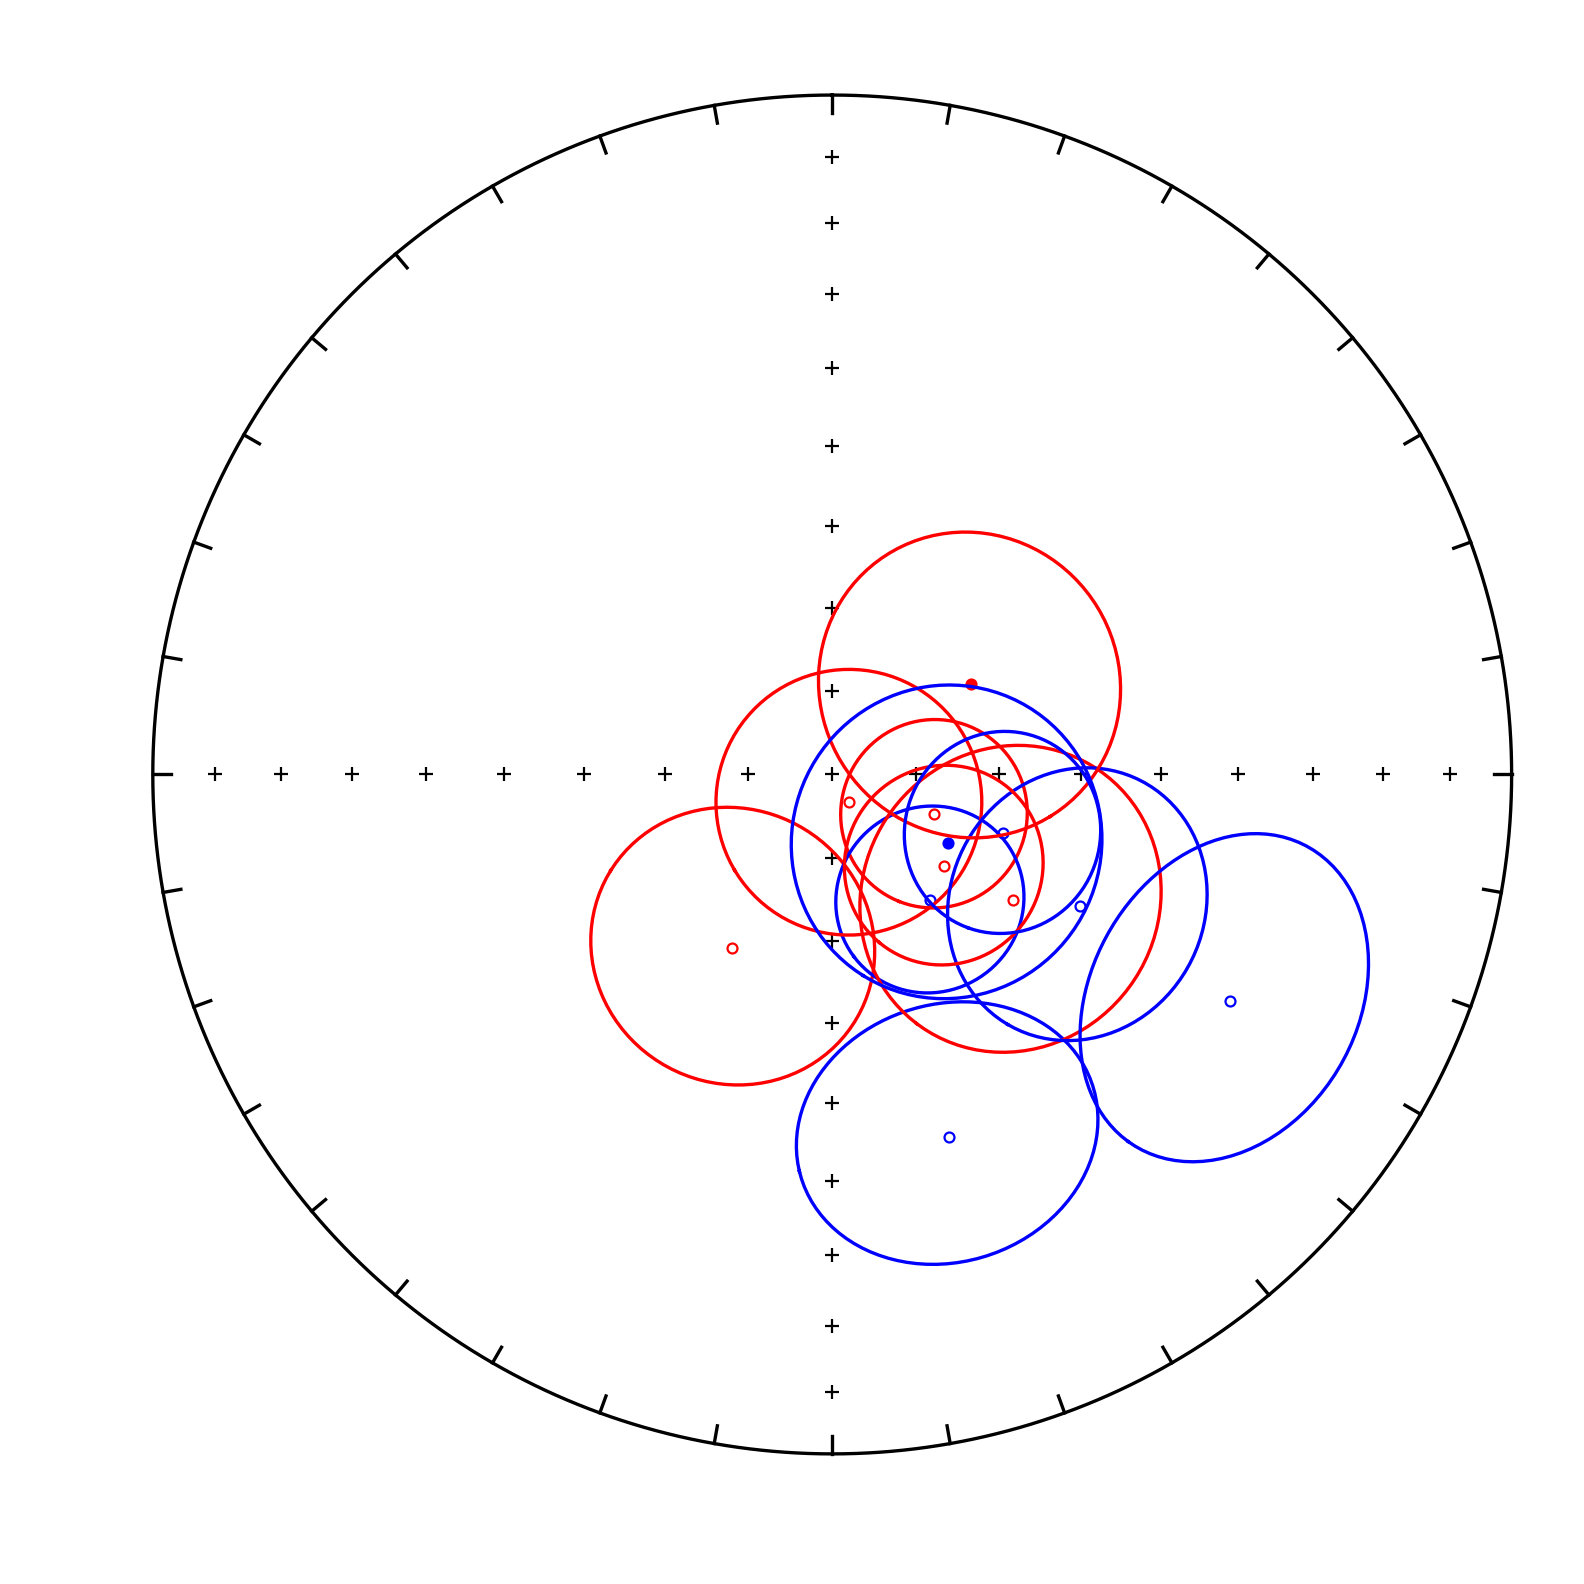

In [39]:
fignum = 1
plt.figure(num=fignum,figsize=(10,10),dpi=160)
ipmag.plot_net(fignum)
for i in range(0,len(PM_data1_HT_tc)):
    if HT_tc_a95[i] < 20:
        ipmag.plot_di_mean(HT_tc_dec[i], HT_tc_inc[i], HT_tc_a95[i],color='red')
        ipmag.plot_di_mean(HT_is_dec[i], HT_is_inc[i], HT_is_a95[i],color='blue')
plt.show()

In [ ]:
fignum = 1
plt.figure(num=fignum,figsize=(10,10),dpi=160)
ipmag.plot_net(fignum)
for i in range(0,len(PM_data1_HT_tc)):
    if HT_tc_a95[i] < 20:
        ipmag.plot_di_mean(HT_tc_dec[i], HT_tc_inc[i], HT_tc_a95[i],color='red')
        ipmag.plot_di_mean(HT_is_dec[i], HT_is_inc[i], HT_is_a95[i],color='blue')
plt.show()

In [46]:
HT_tc_mean = ipmag.fisher_mean(HT_tc_dec,HT_tc_inc)
HT_is_mean = ipmag.fisher_mean(HT_is_dec,HT_is_inc)
ipmag.print_direction_mean(HT_tc_mean)
ipmag.print_direction_mean(HT_is_mean)

Dec: 129.1  Inc: -72.6
Number of directions in mean (n): 6
Angular radius of 95% confidence (a_95): 54.4
Precision parameter (k) estimate: 2.5
Dec: 130.2  Inc: -45.5
Number of directions in mean (n): 6
Angular radius of 95% confidence (a_95): 50.2
Precision parameter (k) estimate: 2.7


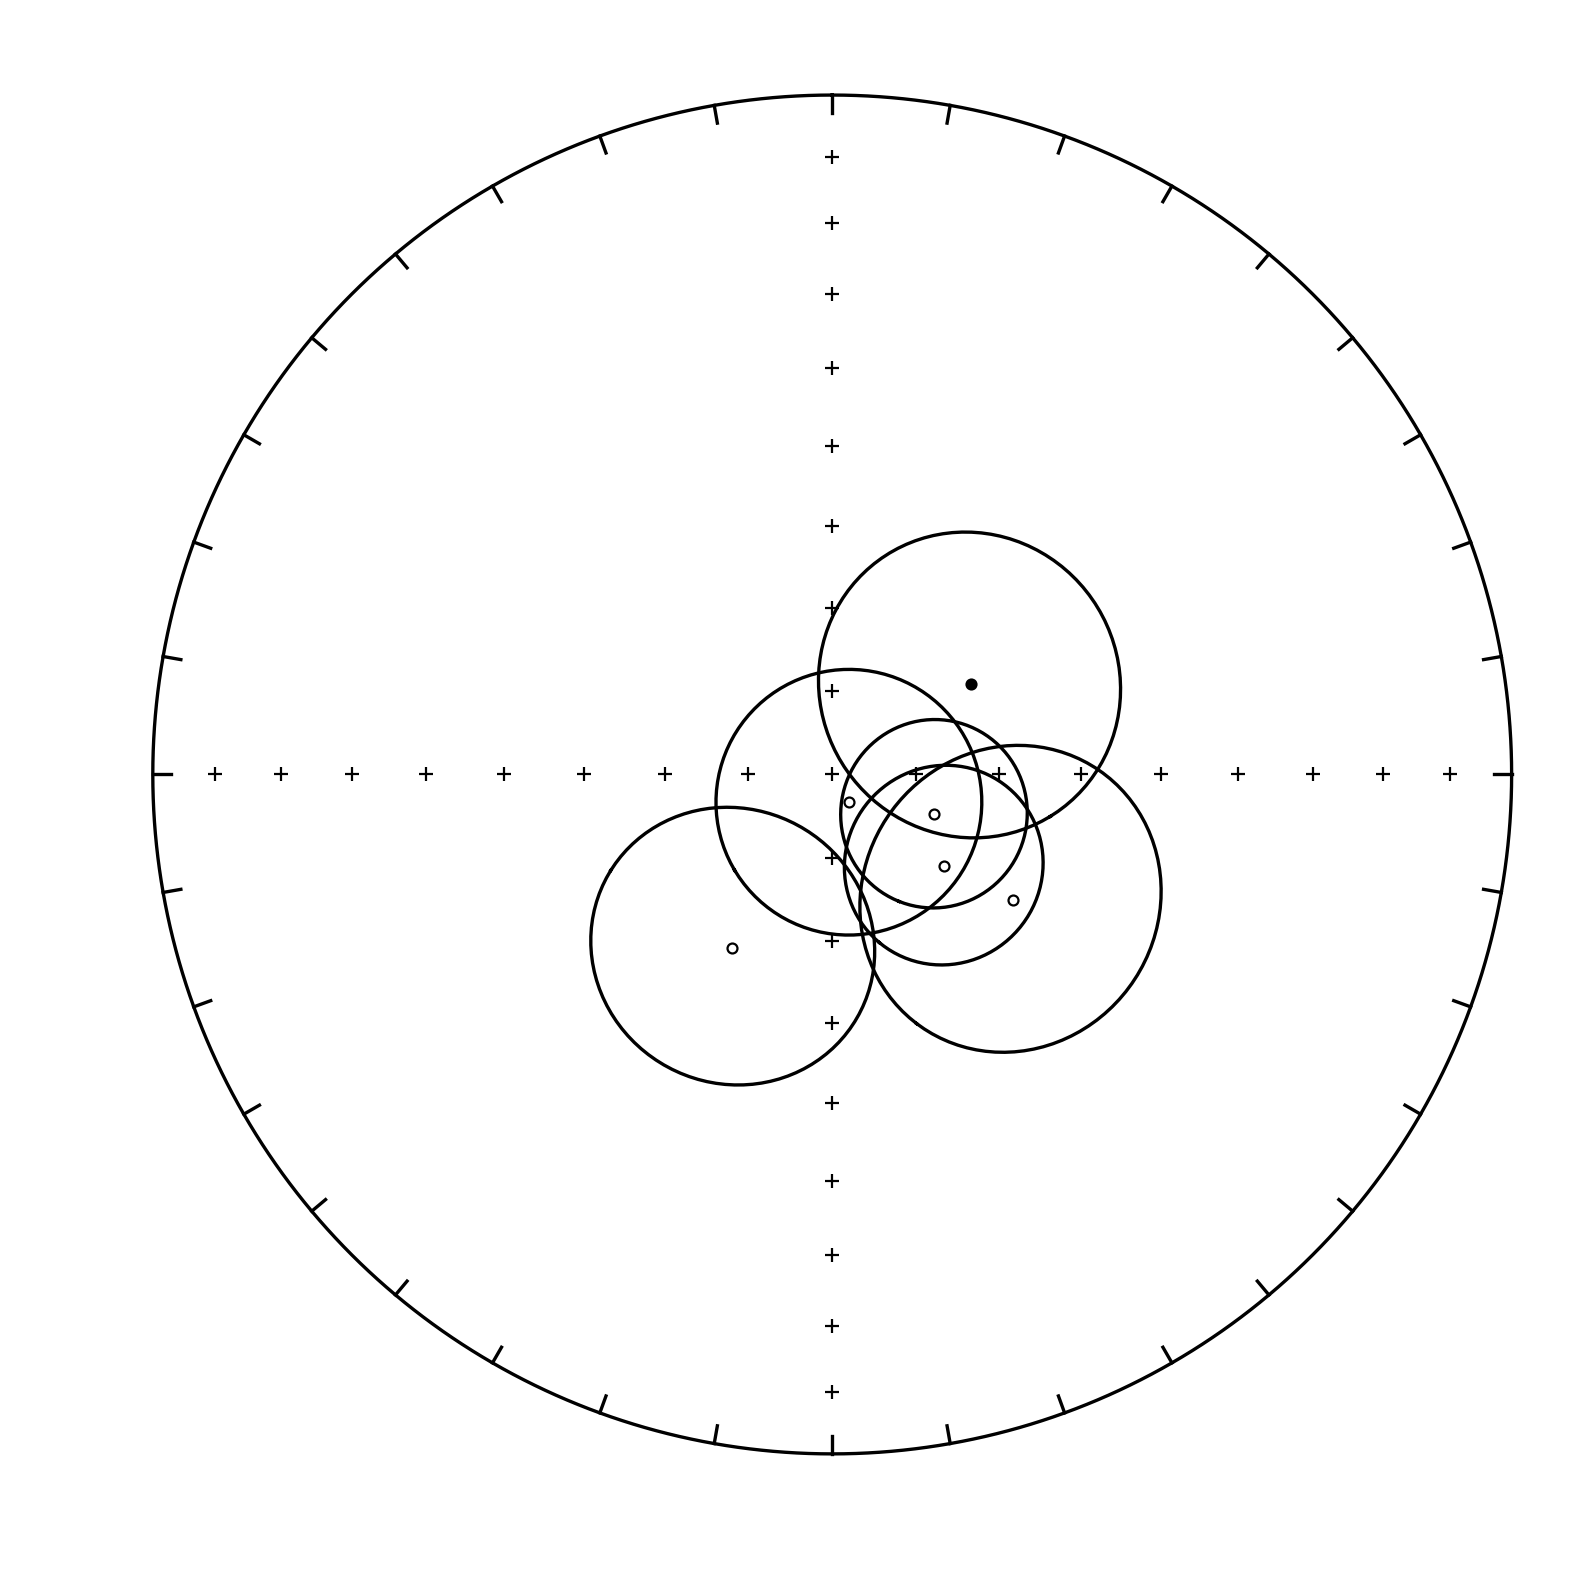

In [34]:
fignum = 1
plt.figure(num=fignum,figsize=(10,10),dpi=160)
ipmag.plot_net(fignum)
for i in range(0,len(PM_data1_HT_tc)):
    ipmag.plot_di_mean(HT_tc_dec[i], HT_tc_inc[i], HT_tc_a95[i])
plt.show()

fignum = 1
plt.figure(num=fignum,figsize=(10,10),dpi=160)
ipmag.plot_net(fignum)
for i in range(0,len(PM_data1_HT_tc)):
    if HT_tc_a95[i] < 20:
        ipmag.plot_di_mean(HT_tc_dec[i], HT_tc_inc[i], HT_tc_a95[i])